# Определение наиболее выгодного региона нефтедобычи

**Описание проекта:**\
Необходимо определить, локацию для новой скважины для добывающей компании на основании проб нефти в 3 регионах: в каждом 10 000 месторождений, известны данные о качестве нефти и объёме её запасов.


**Цель проекта:**\
Определить регион, где добыча принесет максимальную прибыль и где будет минимальный риск убытков

**Задачи проекта:**
- Открыть и проанализировать данные. Подготовить их к построению модели и анализу
- Построить модели линейной регрессии для каждого региона, оценить целевые метрики
- Найти точку безубыточности и посчитать прибыль на построенной модели
- Провести процедуру бутстрепинга, оценить доверительный интервал и риски убытков
- Предложить наилучший регион для разработки

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#geo_data_0.csv" data-toc-modified-id="geo_data_0.csv-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>geo_data_0.csv</a></span></li><li><span><a href="#geo_data_1.csv" data-toc-modified-id="geo_data_1.csv-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>geo_data_1.csv</a></span></li><li><span><a href="#geo_data_2.csv" data-toc-modified-id="geo_data_2.csv-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>geo_data_2.csv</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Удаляем-лишние-колонки" data-toc-modified-id="Удаляем-лишние-колонки-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Удаляем лишние колонки</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Разделение-данных" data-toc-modified-id="Разделение-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Разделение данных</a></span></li><li><span><a href="#Обучение-модели-и-предсказание-на-валидационной-выборке" data-toc-modified-id="Обучение-модели-и-предсказание-на-валидационной-выборке-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Обучение модели и предсказание на валидационной выборке</a></span><ul class="toc-item"><li><span><a href="#Важность-признаков" data-toc-modified-id="Важность-признаков-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Важность признаков</a></span></li><li><span><a href="#x0_train" data-toc-modified-id="x0_train-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>x0_train</a></span></li><li><span><a href="#x1_train" data-toc-modified-id="x1_train-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>x1_train</a></span></li><li><span><a href="#x2_train" data-toc-modified-id="x2_train-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>x2_train</a></span></li></ul></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><span><a href="#Ключевые-переменные" data-toc-modified-id="Ключевые-переменные-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Ключевые переменные</a></span></li><li><span><a href="#Достаточный-объём-сырья-для-безубыточной-разработки-новой-скважины" data-toc-modified-id="Достаточный-объём-сырья-для-безубыточной-разработки-новой-скважины-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Достаточный объём сырья для безубыточной разработки новой скважины</a></span></li></ul></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></div>

## Загрузка и подготовка данных

Импортируем библиотеки:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os.path
import pandas as pd
import seaborn as sns

from scipy import stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split

Настроим вывод для вещественных чисел:

In [2]:
pd.options.display.float_format = '{:,.4f}'.format

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### geo_data_0.csv

Прочитаем файл `geo_data_0.csv` из папки `datasets` и сохраним его в переменной `df`:

In [4]:
try:
    PATH = 'datasets/'
    geo_data_0 = pd.read_csv(os.path.join(PATH, 'geo_data_0.csv'))
    print('Прочитали файл путь:', PATH)
except:
    print('У нас проблема')

Прочитали файл путь: datasets/


Выведем на экран случайные 5 строк таблицы `geo_data_0`:

In [5]:
geo_data_0.sample(5)

,id,f0,f1,f2,product
5009,YLykF,0.1925,1.0117,2.1978,115.6117
21418,OMVic,0.2845,0.0614,9.4632,152.8874
79437,Cmw30,-0.8918,0.5628,-5.8652,65.8760
51996,OPQAR,-1.0584,0.1876,6.8428,154.3982
81660,8xcWn,1.3057,-0.4489,9.5864,173.6037


Получим общую информацию о таблице:

In [6]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Итак, в таблице 5 колонок, 100_000 строк. Тип данных в столбцах: `object`, `float64`. Пропущенных значений нет

**Описание данных**

Признаки:
- `id` — уникальный идентификатор скважины;
- `f0`, `f1`, `f2` — три признака точек (неважно, что они означают, но сами признаки значимы);

Целевой признак:
- `product` — объём запасов в скважине (тыс. баррелей).

Посмотрим на количество уникальных значений по колонкам:

In [7]:
geo_data_0.nunique()

id          99990
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

Оценим столбцы с числовым типом данных: посмотрим на статистические данные, которые дают представление о распределении значений:

In [8]:
geo_data_0.describe()

,f0,f1,f2,product
count,"100,000.0000","100,000.0000","100,000.0000","100,000.0000"
mean,0.5004,0.2501,2.5026,92.5000
std,0.8718,0.5044,3.2482,44.2887
min,-1.4086,-0.8482,-12.0883,0.0000
25%,-0.0726,-0.2009,0.2877,56.4975
50%,0.5024,0.2503,2.5160,91.8500
75%,1.0736,0.7006,4.7151,128.5641
max,2.3623,1.3438,16.0038,185.3643


Построим тепловую матрицу корреляций:

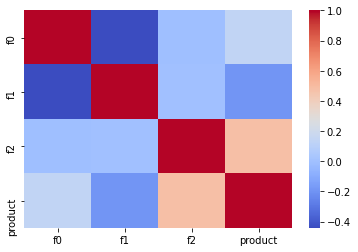

In [9]:
sns.heatmap(geo_data_0.corr(),cmap='coolwarm',annot=False)
plt.show()

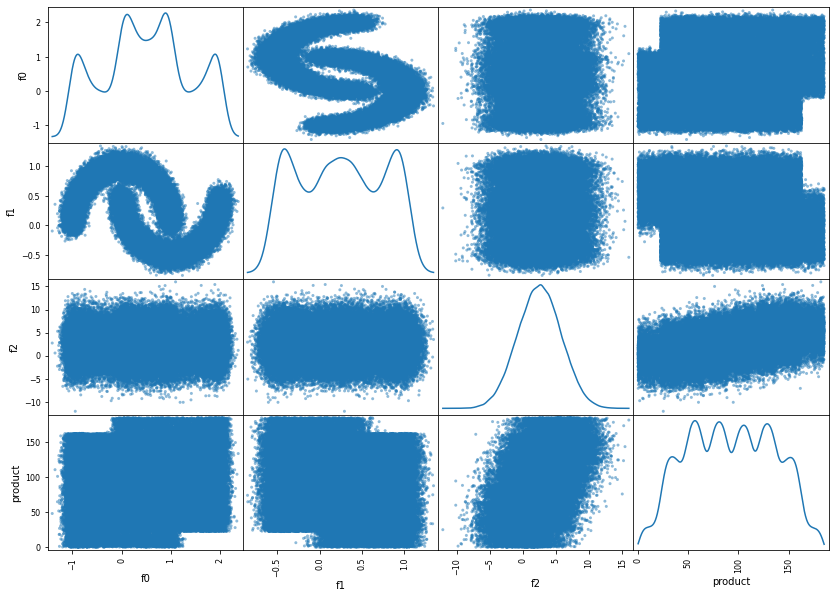

In [10]:
pd.plotting.scatter_matrix(geo_data_0, diagonal='kde', figsize=(14, 10))
plt.show()

Видим, что есть корреляция между `f2` и целевым признаком

### geo_data_1.csv

Прочитаем файл `geo_data_1.csv` из папки `datasets` и сохраним его в переменной `geo_data_1`:

In [11]:
try:
    PATH = 'datasets/'
    geo_data_1 = pd.read_csv(os.path.join(PATH, 'geo_data_1.csv'))
    print('Прочитали файл путь:', PATH)
except:
    print('У нас проблема')

Прочитали файл путь: datasets/


Выведем на экран случайные 5 строк таблицы `geo_data_1`:

In [12]:
geo_data_1.sample(5)

,id,f0,f1,f2,product
81874,D5ORb,0.3507,0.9983,5.0014,137.9454
18953,uPKWp,-1.8866,0.7548,1.9918,57.0856
14483,P6oY6,11.7850,1.5784,0.0074,0.0000
70790,wNtzF,-6.5013,-6.6842,-0.0159,3.1791
63933,4E1yD,13.0607,-0.3725,3.0045,80.8598


Получим общую информацию о таблице:

In [13]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Итак, в таблице 5 колонок, 100_000 строк. Тип данных в столбцах: `object`, `float64`. Пропущенных значений нет

Посмотрим на количество уникальных значений по колонкам:

In [14]:
geo_data_1.nunique()

id          99996
f0         100000
f1         100000
f2         100000
product        12
dtype: int64

In [15]:
geo_data_1['product'].value_counts()

53.9065     8472
26.9533     8468
84.0389     8431
57.0856     8390
3.1791      8337
80.8598     8320
30.1324     8306
134.7663    8304
110.9921    8303
0.0000      8235
137.9454    8233
107.8130    8201
Name: product, dtype: int64

Оценим столбцы с числовым типом данных: посмотрим на статистические данные, которые дают представление о распределении значений:

In [16]:
geo_data_1.describe()

,f0,f1,f2,product
count,"100,000.0000","100,000.0000","100,000.0000","100,000.0000"
mean,1.1413,-4.7966,2.4945,68.8250
std,8.9659,5.1199,1.7036,45.9444
min,-31.6096,-26.3586,-0.0181,0.0000
25%,-6.2986,-8.2680,1.0000,26.9533
50%,1.1531,-4.8132,2.0115,57.0856
75%,8.6210,-1.3328,3.9999,107.8130
max,29.4218,18.7341,5.0197,137.9454


Построим тепловую матрицу корреляций:

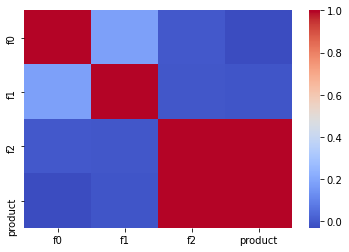

In [17]:
sns.heatmap(geo_data_1.corr(),cmap='coolwarm',annot=False)
plt.show()

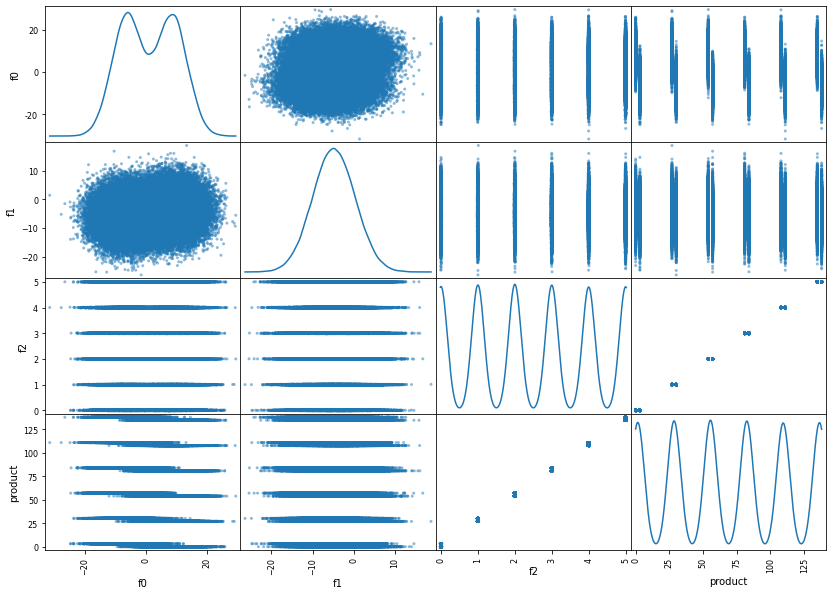

In [18]:
pd.plotting.scatter_matrix(geo_data_1, diagonal='kde', figsize=(14, 10))
plt.show()

Видим, сильную корреляции между признаком `f2` и целевым признаком

### geo_data_2.csv

Прочитаем файл `geo_data_2.csv` из папки `datasets` и сохраним его в переменной `geo_data_2`:

In [19]:
try:
    PATH = 'datasets/'
    geo_data_2 = pd.read_csv(os.path.join(PATH, 'geo_data_2.csv'))
    print('Прочитали файл путь:', PATH)
except:
    print('У нас проблема')

Прочитали файл путь: datasets/


Выведем на экран случайные 5 строк таблицы `geo_data_1`:

In [20]:
geo_data_2.sample(5)

,id,f0,f1,f2,product
68416,pGCj3,1.7884,0.1265,11.1126,138.1784
56752,Esorh,-0.0658,2.1575,6.2991,104.7555
85505,g7ViV,1.0069,-1.2751,3.5573,103.1504
70140,Zv56Z,-1.4059,3.0299,2.9542,89.5577
54165,pxTl0,0.4279,0.0014,5.3677,55.3191


Получим общую информацию о таблице:

In [21]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Итак, в таблице 5 колонок, 100_000 строк. Тип данных в столбцах: `object`, `float64`. Пропущенных значений нет

Посмотрим на количество уникальных значений по колонкам:

In [22]:
geo_data_2.nunique()

id          99996
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

Оценим столбцы с числовым типом данных: посмотрим на статистические данные, которые дают представление о распределении значений:

In [23]:
geo_data_2.describe()

,f0,f1,f2,product
count,"100,000.0000","100,000.0000","100,000.0000","100,000.0000"
mean,0.0020,-0.0021,2.4951,95.0000
std,1.7320,1.7304,3.4734,44.7499
min,-8.7600,-7.0840,-11.9703,0.0000
25%,-1.1623,-1.1748,0.1304,59.4504
50%,0.0094,-0.0095,2.4842,94.9256
75%,1.1585,1.1637,4.8588,130.5950
max,7.2383,7.8448,16.7394,190.0298


Построим тепловую матрицу корреляций:

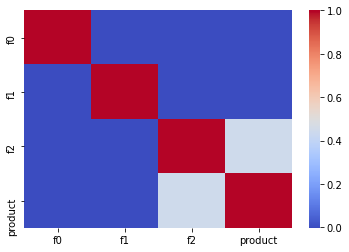

In [24]:
sns.heatmap(geo_data_2.corr(),cmap='coolwarm',annot=False)
plt.show()

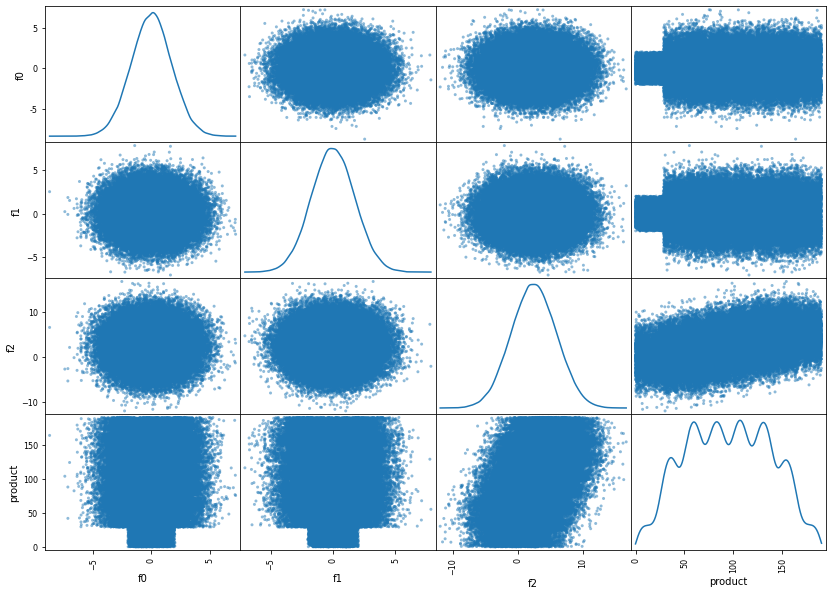

In [25]:
pd.plotting.scatter_matrix(geo_data_2, diagonal='kde', figsize=(14, 10))
plt.show()

Видим, что сильной корреляции признаков нет

## Предобработка данных

### Обработка дубликатов

Определим имена для таблиц:

In [26]:
geo_data_0.name = 'geo_data_0'
geo_data_1.name = 'geo_data_1'
geo_data_2.name = 'geo_data_2'

In [27]:
df_lst = [geo_data_0, geo_data_1, geo_data_2]
for df in df_lst:
    print('Количество дубликатов в {} по колонке id = {}'.format(df.name, df.duplicated(subset=['id']).sum()))

Количество дубликатов в geo_data_0 по колонке id = 10
Количество дубликатов в geo_data_1 по колонке id = 4
Количество дубликатов в geo_data_2 по колонке id = 4


Посмотрим на дубликаты для каждого региона, чтобы принять решения какие данные надо удалить

In [28]:
for df in df_lst:
    print('Регион {}:'.format(df.name))
    df_groupby = df[df.groupby(df.id)['id'].transform('count') > 1].sort_values(by='id')
    display(df_groupby.T)

Регион geo_data_0:


,66136,64022,51970,3389,69163,42529,931,7530,63593,1949,75715,21426,92341,60140,89582,97785,41724,1364,16633,90815
id,74z30,74z30,A5aEY,A5aEY,AGS9W,AGS9W,HZww2,HZww2,QcMuo,QcMuo,Tdehs,Tdehs,TtcGQ,TtcGQ,bsk9y,bsk9y,bxg6G,bxg6G,fiKDv,fiKDv
f0,1.0850,0.7415,-0.1803,-0.0399,-0.9338,1.4547,0.7553,1.0612,0.6356,0.5066,0.1121,0.8294,0.1107,0.5693,0.3989,0.3784,-0.8238,0.4116,0.1573,0.0499
f1,-0.3124,0.4592,0.9355,0.1569,0.1162,-0.4797,0.3685,-0.3740,-0.4734,-0.3238,0.4303,0.2988,1.0227,-0.1049,-0.4003,0.0058,0.5463,0.8568,1.0284,0.8413
f2,6.9908,5.1531,-2.0948,0.2099,-3.6559,0.6834,1.8632,10.4302,0.8627,-2.2156,3.2190,-0.0496,0.9114,6.4402,10.1224,0.1608,3.6305,-3.6534,5.5856,6.3946
product,127.6433,140.7715,33.0202,89.2494,19.2305,126.3705,30.6818,158.8287,64.5787,75.4965,60.9640,96.0353,101.3180,85.3502,163.4331,160.6373,93.0078,73.6043,95.8179,137.3466


Регион geo_data_1:


,5849,84461,1305,41906,2721,82178,47591,82873
id,5ltQ6,5ltQ6,LHZR0,LHZR0,bfPNe,bfPNe,wt4Uk,wt4Uk
f0,-3.4354,18.2138,11.1708,-8.9897,-9.4944,-6.2028,-9.0911,10.2600
f1,-12.2960,2.1920,-1.9451,-4.2866,-5.4637,-4.8200,-8.1093,-9.3764
f2,1.9998,3.9939,3.0029,2.0091,4.0060,2.9951,-0.0023,4.9943
product,57.0856,107.8130,80.8598,57.0856,110.9921,84.0389,3.1791,134.7663


Регион geo_data_2:


,45404,55967,11449,49564,44378,95090,28039,43233
id,KUPhW,KUPhW,VF7Jo,VF7Jo,Vcm5J,Vcm5J,xCHr8,xCHr8
f0,0.2318,1.2112,2.1227,-0.8831,-1.2295,2.5877,1.6330,-0.8471
f1,-1.6989,3.1764,-0.8583,0.5605,-2.4392,1.9869,0.3681,2.1018
f2,4.9908,5.5435,5.7460,0.7236,1.2229,2.4822,-2.3784,5.5971
product,11.7163,132.8318,181.7168,136.2334,137.9683,92.3276,6.1205,184.3886


Нет явного решения какие данные для одного и того же id в регионе являются более реалистичными, если вообще можно так сказать о синтетических данных нашего проекта. Так как количество дубликатов в таблицах ничтожно мало по сравнению с количеством строк, то просто удалим повторяющиеся id-шники

Удаляем дубликаты:

In [29]:
for df in df_lst:
    df.drop_duplicates(subset=['id'], inplace=True)
    print('Новый размер таблицы {} = {}'.format(df.name, df.shape))

Новый размер таблицы geo_data_0 = (99990, 5)
Новый размер таблицы geo_data_1 = (99996, 5)
Новый размер таблицы geo_data_2 = (99996, 5)


### Удаляем лишние колонки

Неинформативные колонки, которые не пригодятся нам:

In [30]:
for df in df_lst:
    df.drop(columns=['id'], inplace=True)

## Анализ данных

Напишем функцию `histplot_boxplot` для вывода на экран распределения признака и ящика с усами

In [31]:
def histplot_boxplot(df, column, bins=100, kde=True):
    """
    df - датафрейм
    column - название колонки для построения распределения
    bins - количество корзин (50 по умолчанию)
    kde - 
    
    """
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.13, .87)}, figsize=(10, 4))
    sns.boxplot(data=df, 
                x=column,  
                orient='h',
                order=[1,0],
                palette='husl',
                ax=ax_box)
    sns.histplot(data=df, 
                 x=column, 
                 bins=bins, 
                 kde=kde, 
                 palette='husl', 
                 hue_order=[1,0],
                 ax=ax_hist)
 
    ax_box.set(xlabel='')
    ax_box.set(title='Ящик с усами для "{}" {}'.format(column, df.name))
    ax_hist.set(title='Распределение признака "{}"'.format(column))
    plt.show()

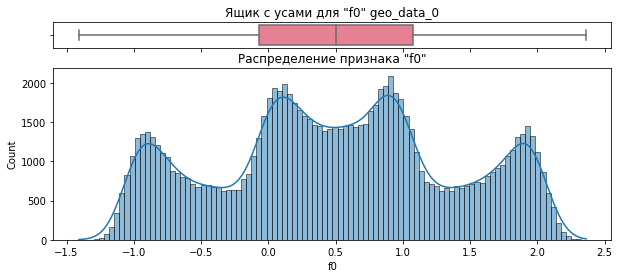

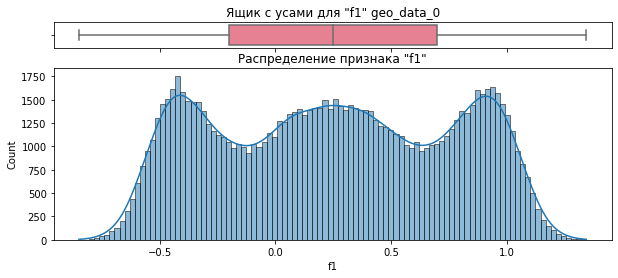

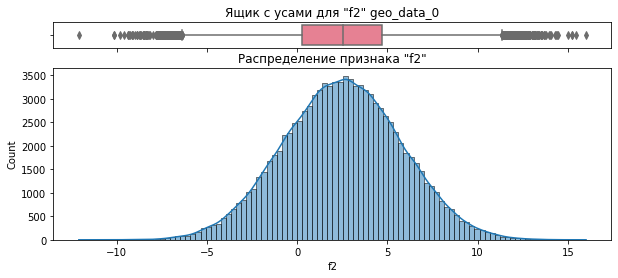

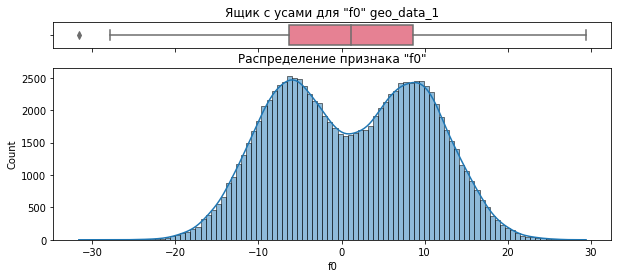

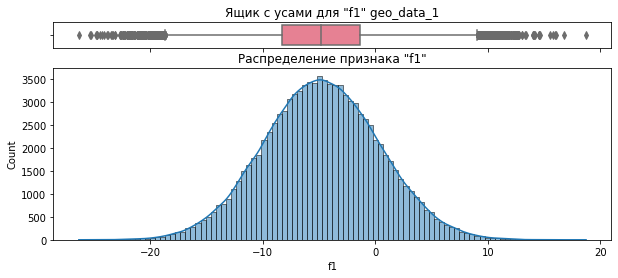

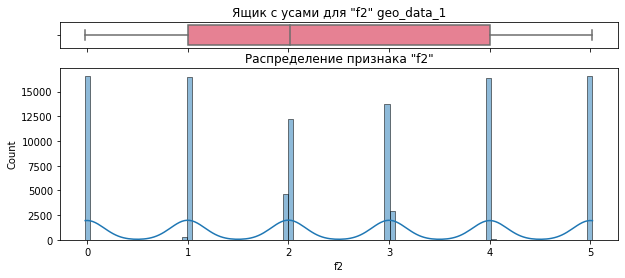

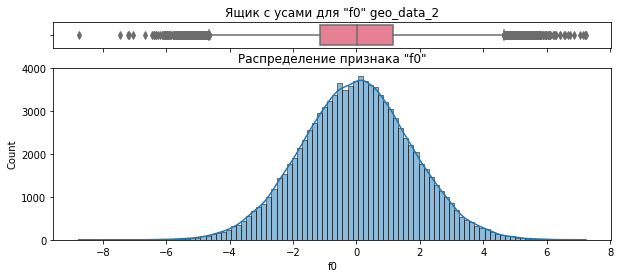

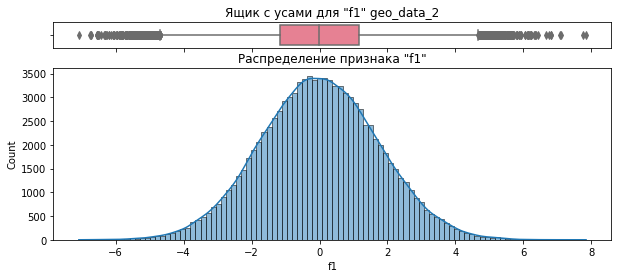

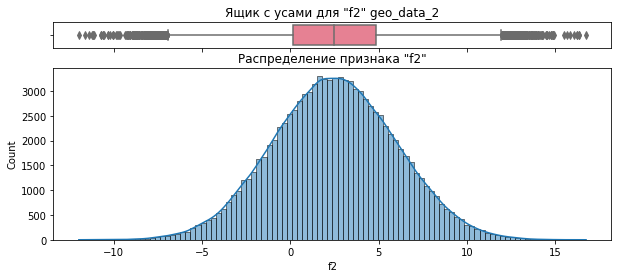

In [32]:
for df in df_lst:
    for column in df.drop(columns='product').columns:
        histplot_boxplot(df, column)

Красивые гистограммы признаков в очередной раз убеждают нас в том, что данные синтетические

## Обучение и проверка модели

Подготовим входные признаки `x` и целевой признак `y` для каждого региона:

In [33]:
y0 = geo_data_0['product']
x0 = geo_data_0.drop(columns=['product'])

In [34]:
y1 = geo_data_1['product']
x1 = geo_data_1.drop(columns=['product'])

In [35]:
y2 = geo_data_2['product']
x2 = geo_data_2.drop(columns=['product'])

### Разделение данных

Зафиксируем параметр псевдослучайности для наших моделей и выборок:

In [36]:
rnd_st = 12345

Разделим исходные данные на обучающую `train` и тестовую выборки `test` в пропорции 3:1

In [37]:
x0_train, x0_valid, y0_train, y0_valid = train_test_split(x0, y0, test_size=0.25, random_state=rnd_st)

In [38]:
x1_train, x1_valid, y1_train, y1_valid = train_test_split(x1, y1, test_size=0.25, random_state=rnd_st)

In [39]:
x2_train, x2_valid, y2_train, y2_valid = train_test_split(x2, y2, test_size=0.25, random_state=rnd_st)

### Обучение модели и предсказание на валидационной выборке

#### Важность признаков

Посмотрим какие признаки являются самыми важными для модели в деле предсказания

Визуализируем и квантифицируем показатели важности признаков, обратившись к атрибуту `coef_`, который даёт нам веса признаков, оцененые линейной регрессией

In [40]:
def importances_of_feature(model, x_train, y_train):
    """
    model - модель
    x - входные признаки обучающая выборка
    y - целевой признак  обучающая выборка
    
    """
    model.fit(x_train, y_train)
    feats = {}
    for feature, importance in zip(x_train.columns, model.coef_):
        feats[feature] = importance
    importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Score'})
    importances = importances.sort_values(by='Score', ascending=False)
    importances = importances.reset_index()
    importances = importances.rename(columns={'index': 'Features'})
    sns.set(style="whitegrid", color_codes=True)
    fig, ax = plt.subplots(figsize=(6,1.4))
    sns.barplot(x=importances['Score'], y=importances['Features'], data=importances, color='gold')
    plt.xlabel('Важность', fontsize=13)
    plt.ylabel('Признаки', fontsize=13)
    plt.title('Важность" признаков для модели', fontsize=14)
    plt.show()
    display(importances)

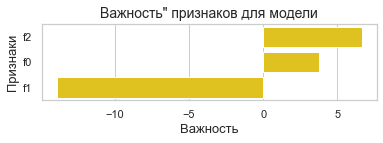

,Features,Score
0,f2,6.6341
1,f0,3.7820
2,f1,-13.8927


In [41]:
#первый регион
model = LinearRegression()
importances_of_feature(model, x0_train, y0_train)

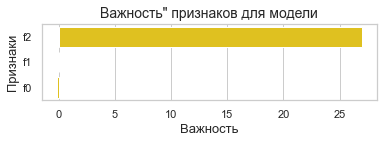

,Features,Score
0,f2,26.9508
1,f1,-0.0220
2,f0,-0.1448


In [42]:
#второй регион
importances_of_feature(model, x1_train, y1_train)

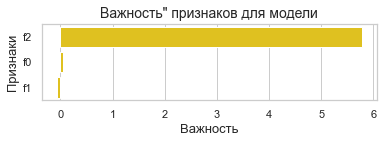

,Features,Score
0,f2,5.7720
1,f0,0.0521
2,f1,-0.0616


In [43]:
#третий регион
importances_of_feature(model, x2_train, y2_train)

Для второго и третьего регионов посмотрим как модель поведет себя без признаков `f1` и `f2`, то есть без наименее важных признаков

#### x0_train

Cоздадим таблицу `results` для хранения результатов:

In [44]:
data = {
    'model': [], 
    'comment': [], 
    'mean target': [], 
    'mean predict': [], 
    'rmse':[], 
    'r2':[],
    'mape':[]
}
results = pd.DataFrame(data=data)

Напишем функцию `mape_func` для расчета метрики `MAPE`, которая при большИх значениях метрики будет возвращать `+inf`

In [45]:
def mape_func(true, pred):
    mape = mean_absolute_percentage_error(true, pred)
    if mape > 1_000_000:
        return '+inf'
    else:
        return mape

Напишем функцию `model_result`, которая возвращает предсказанные значения и метрики

In [46]:
def model_result(model, comment, x_train, y_train, x_valid, y_valid):
    """
    model - модель
    comment - дополнительный комментарий в таблицу
    x - входные признаки валидационная выборка
    y - целевой признак валидационная выборка
    
    """
    model.fit(x_train, y_train)
    y_pred = model.predict(x_valid)
    mean_target = np.mean(y_valid)
    mean_predict = np.mean(y_pred)
    y_pred = pd.Series(y_pred, index=y_valid.index)
    rmse = mean_squared_error(y_valid, y_pred, squared=False)
    r2 = r2_score(y_valid, y_pred)
    mape = mape_func(y_valid, y_pred)
    results.loc[len(results)] = [model.__class__.__name__, comment, mean_target, mean_predict, rmse, r2, mape]
    results.drop_duplicates(inplace=True)
    return y_pred, results

In [47]:
model = LinearRegression()
y0_pred, results = model_result(model, '1 регион', x0_train, y0_train, x0_valid, y0_valid)
results

,model,comment,mean target,mean predict,rmse,r2,mape
0,LinearRegression,1 регион,92.1582,92.7892,37.8535,0.2724,1.3466


#### x1_train

In [48]:
y1_pred, results = model_result(model, '2 регион', x1_train, y1_train, x1_valid, y1_valid)

In [49]:
_, results = model_result(
    model, 
    '2 регион без f1', 
    x1_train.drop(columns=['f1']), 
    y1_train, 
    x1_valid.drop(columns=['f1']), 
    y1_valid
)

In [50]:
_, results = model_result(
    model, 
    '2 регион без f0', 
    x1_train.drop(columns=['f0']), 
    y1_train, 
    x1_valid.drop(columns=['f0']), 
    y1_valid
)
results

,model,comment,mean target,mean predict,rmse,r2,mape
0,LinearRegression,1 регион,92.1582,92.7892,37.8535,0.2724,1.3466
1,LinearRegression,2 регион,69.1860,69.1783,0.8921,0.9996,+inf
2,LinearRegression,2 регион без f1,69.1860,69.1793,0.8979,0.9996,+inf
3,LinearRegression,2 регион без f0,69.1860,69.1736,1.5577,0.9988,+inf


In [51]:
y1_pred.mean()

69.17831957030432

#### x2_train

In [52]:
y2_pred, results = model_result(model, '3 регион', x2_train, y2_train, x2_valid, y2_valid)

In [53]:
_, results = model_result(
    model, 
    '3 регион без f0', 
    x2_train.drop(columns=['f0']), 
    y2_train, 
    x2_valid.drop(columns=['f0']), 
    y2_valid
)

In [54]:
_, results = model_result(
    model, 
    '3 регион без f1', 
    x2_train.drop(columns=['f1']), 
    y2_train, 
    x2_valid.drop(columns=['f1']), 
    y2_valid
)

In [55]:
results

,model,comment,mean target,mean predict,rmse,r2,mape
0,LinearRegression,1 регион,92.1582,92.7892,37.8535,0.2724,1.3466
1,LinearRegression,2 регион,69.1860,69.1783,0.8921,0.9996,+inf
2,LinearRegression,2 регион без f1,69.1860,69.1793,0.8979,0.9996,+inf
3,LinearRegression,2 регион без f0,69.1860,69.1736,1.5577,0.9988,+inf
4,LinearRegression,3 регион,94.7851,94.8657,40.0759,0.1956,3.3319
5,LinearRegression,3 регион без f0,94.7851,94.8673,40.0744,0.1956,3.3327
6,LinearRegression,3 регион без f1,94.7851,94.8660,40.0755,0.1956,3.3334


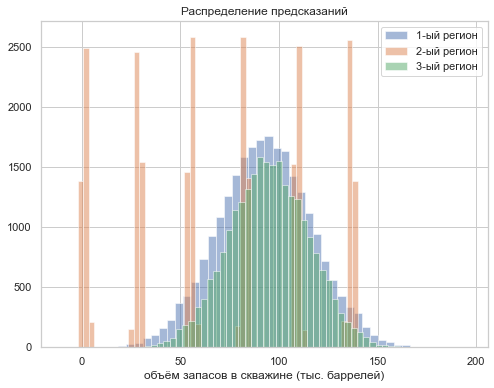

In [56]:
plt.figure(figsize=(8,6))
y0_pred.hist(bins=50, alpha=0.5, label='1-ый регион')
y1_pred.hist(bins=50, alpha=0.5,label='2-ый регион')
y2_pred.hist(bins=50, alpha=0.5,label='3-ый регион')
plt.title('Распределение предсказаний')
plt.xlabel('объём запасов в скважине (тыс. баррелей)')
plt.legend(loc='upper right')
plt.show()

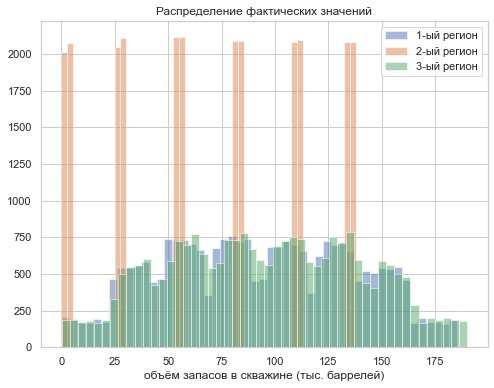

In [57]:
plt.figure(figsize=(8,6))
y0_valid.hist(bins=50, alpha=0.5, label='1-ый регион')
y1_valid.hist(bins=50, alpha=0.5,label='2-ый регион')
y2_valid.hist(bins=50, alpha=0.5,label='3-ый регион')
plt.title('Распределение фактических значений')
plt.xlabel('объём запасов в скважине (тыс. баррелей)')
plt.legend(loc='upper right')
plt.show()

**Вывод:**

- все 3 модели предсказывают значения, близкие к истинным: средние предсказанные значения по регионам близки к средним истинным
- наилучшими прогнозными свойствами обладает модель для 2-го региона из-за сильной корреляции признака `f2` и целевого признака: метрика r2 (коэффициент детерминации) стремится к единице
- Модель для 1-го региона чуть лучше предсказывает по сравнению с моделью для 3-го гериона: `r2` метрика 0.2724 для первого региона и 0.1956 для третьего

## Подготовка к расчёту прибыли

### Ключевые переменные

In [58]:
#бюджет на разработку скважин в регионе, млн.руб
BUDGET = 10_000
#количество точек при разведке региона
N_RESEARCH = 500
#количество точек для разработки в регионе
N_BEST = 200
#доход с каждой единицы продукта(c тысячи баррелей), млн.руб
REVENUE_PER_1000_BAR = 0.45

### Достаточный объём сырья для безубыточной разработки новой скважины

Рассчитаем по следующей формуле:

In [59]:
print('{:.2f}'.format(BUDGET / (REVENUE_PER_1000_BAR * N_BEST)))

111.11


**Вывод:**

Достаточный объем сырья для безубыточной разработки скважины составил 111.11 тыс. баррелей. 

Средние значения запасов сырья для всех трех регионов ниже полученного достаточного объема.

При случайном выборе скважин для разработки имеется высокая доля риска не окупить затраченный бюджет, поэтому важно иметь модель, которая наиболее корректно предсказывала бы объем продукта в зависимости от известных факторов.

## Расчёт прибыли и рисков 

Напишите функцию `profit` для расчёта прибыли:


In [60]:
def profit(target, predict):
    """
    target - целевые значения
    predict - предсказания
    выберем скважины с максимальными значениями предсказаний;
    просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям;
    рассчитаем прибыль для полученного объёма сырья.
    value - прибыль на n_best скважинах с максимально предсказанными запасами
    
    """
    predict_sorted = predict.sort_values(ascending=False)
    target_selected = target[predict_sorted.index][:N_BEST]
    value = np.sum(target_selected.values * REVENUE_PER_1000_BAR) - BUDGET
    return value

Напишем функцию `bootstrap_ci`, в которой применим технику `Bootstrap` с 1000 выборок, чтобы найти распределение прибыли и 95%-й доверительный интервал

In [61]:
state = np.random.RandomState(12345)

In [62]:
def bootstrap_ci(target, predict, n_bootstrap, n_research, comment):
    """
    target - целевые значения
    predict - предсказания
    n_bootstrap - количество бутстрапированных выборок
    n_research - количество скважин для исследования
    n_best - количество лучших скважин для разработки
    comment - доп текст в заголовок графика
    mean_profit - средняя прибыль
    ci - 95% доверительный интервал
    
    """
    values = []
    counter_of_losses = 0
    for i in range(n_bootstrap):
        target_subsample = target.sample(n=n_research, replace=True, random_state=state)
        predict_subsample = predict[target_subsample.index]
        value = profit(target_subsample, predict_subsample)
        values.append(value)
        if value < 0:
            counter_of_losses += 1
    mean_profit = np.mean(values)
    print('Средняя прибыль {:.2f} млн.руб'.format(mean_profit))
    lower = np.quantile(values, 0.025)
    upper = np.quantile(values, 0.975)
    print('95%-ый доверит. интервал ({:.1f} млн.руб, {:.1f} млн.руб)'.format(lower, upper))
    print('Риск убытков: {:.2%}'.format(counter_of_losses / n_bootstrap))
    sns.histplot(data=values, kde=True, bins=100)
    plt.xlabel('Прибыль, млн.руб', fontsize=13)
    plt.title('Распределение прибыли {}'.format(comment), fontsize=14)
    plt.axvline(x=lower, color='g')
    plt.axvline(x=upper, color='g')
    plt.show()

Средняя прибыль 409.43 млн.руб
95%-ый доверит. интервал (-131.5 млн.руб, 944.4 млн.руб)
Риск убытков: 7.10%


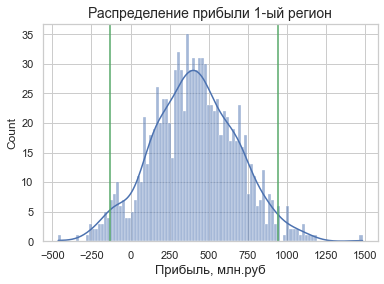

In [63]:
bootstrap_ci(y0_valid, y0_pred, 1000, N_RESEARCH,'1-ый регион')

Средняя прибыль 536.40 млн.руб
95%-ый доверит. интервал (113.0 млн.руб, 998.5 млн.руб)
Риск убытков: 0.30%


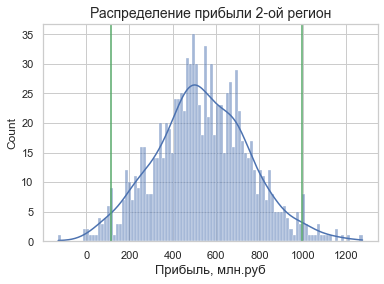

In [64]:
bootstrap_ci(y1_valid, y1_pred, 1000, N_RESEARCH, '2-ой регион')

Средняя прибыль 339.48 млн.руб
95%-ый доверит. интервал (-224.1 млн.руб, 847.1 млн.руб)
Риск убытков: 11.80%


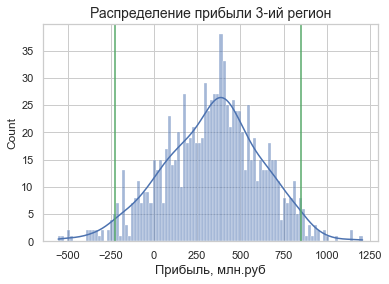

In [65]:
bootstrap_ci(y2_valid, y2_pred, 1000, N_RESEARCH, '3-ий регион')

## Вывод:

- Все три региона являются прибыльными
- 1-ый и 3-й регионы обладают очень высокой вероятностью убытков, поэтому не проходят по критериям установленной бизнес-задачи (риск убытков должен быть меньше 2,5%). Левая граница доверительных интервалов указанных регионов принимает отрицательное значение, что говорит о том, что более 2.5% выборок имеют отрицательную прибыль.
- 2-й регион обладает наибольшей средней прибылью, а также единственный соответствует условию по минимальному риску  убытков (левая граница 95-% доверительного интервала - положительная). В связи с чем для дальнейшей разработки заказчику предлагается принять только 2-й регион.